In [114]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import random
from collections import deque 
import time
import copy


MIN_X = -100
MIN_Y = -100
MIN_Z = 0
MAX_X = 100
MAX_Y = 100
MAX_Z = 50
NUMBER_OF_CONNECTIONS = 2


class City:
    def __init__(self) -> None:
        self.cords = np.array([
            randint(MIN_X, MAX_X),
            randint(MIN_Y, MAX_Y),
            randint(MIN_Z, MAX_Z)
        ])
        self.distances = []


class WebOfCities:
    def __init__(self, number_of_cities) -> None:
        self.number_of_cities = number_of_cities
        self.cities = []
        self.create_list_of_cities()

    def create_list_of_cities(self):
        self.cities = [City() for _ in range(0, self.number_of_cities)]

    def create_weighted_connections_100(self):
        for city in self.cities:
            distance = []
            for i in range(0, self.number_of_cities):
                if city.cords[2]  > self.cities[i].cords[2]:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords)*0.9)
                elif city.cords[2]  < self.cities[i].cords[2]:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords)*1.1)
                else:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords))
            city.distances = distance

    def create_weighted_connections_80(self):
        for city in self.cities:
            distance = []
            for i in range(0, self.number_of_cities):
                if city.cords[2]  > self.cities[i].cords[2]:
                    actual_distance = np.linalg.norm(city.cords - self.cities[i].cords)*0.9
                elif city.cords[2]  < self.cities[i].cords[2]:
                    actual_distance = np.linalg.norm(city.cords - self.cities[i].cords)*1.1
                else:
                    actual_distance = np.linalg.norm(city.cords - self.cities[i].cords)
                if random.random() > 0.2:
                    distance.append(actual_distance)
                else:
                    distance.append(0)
            city.distances = distance

    def create_connections_100(self):
        for city in self.cities:
            distance = [np.linalg.norm(city.cords - self.cities[i].cords) for i in range(0, len(self.cities))]
            city.distances = distance
    
    def create_connections_80(self):
        for city in self.cities:
            distance = []
            for i in range(0, self.number_of_cities):
                if random.random() > 0.2:
                    distance.append(np.linalg.norm(city.cords - self.cities[i].cords))
                else:
                    distance.append(0)
            city.distances = distance

class Graph:
    def __init__(self, cities) -> None:
        self.cities = cities

    def create_adjacency_matrix(self):
        adjacency_matrix_ls = []
        for city in self.cities:
            list_of_distance = []
            for distance in city.distances:
                list_of_distance.append(distance)
            adjacency_matrix_ls.append(list_of_distance)
        adjacency_matrix = np.array(adjacency_matrix_ls)
        return adjacency_matrix

    def create_adjacency_weighted_matrix(self):
        adjacency_matrix_ls = []
        for city in self.cities:
            list_of_distance = []
            for distance in city.distances:
                list_of_distance.append(distance)
            adjacency_matrix_ls.append(list_of_distance)
        adjacency_matrix = np.array(adjacency_matrix_ls)
        return adjacency_matrix

In [48]:
class PathCounter:
    def __init__(self, adjacency_matrix, all_paths) -> None:
        self.adjacency_matrix = adjacency_matrix
        self.all_paths = all_paths
        self.all_distances = []
        self.index_of_min_distance = 0

    def count_all_distances(self):
        self.all_distances = []
        for path in self.all_paths:
            distance = 0
            for i in range(len(path)-1):
                distance += self.adjacency_matrix[path[i]][path[i+1]]
            self.all_distances.append(distance)

    def print_min_possible_path(self):
        min_distance = min(self.all_distances)
        self.index_of_min_distance = self.all_distances.index(min_distance)
        path = self.all_paths[self.index_of_min_distance]
        #distance = min_distance + self.adjacency_matrix[path[-1]][0]
        #path.append(0)
        print(f"min distance is {min_distance} for path")
        print(path)
        #return path
        return (path, min_distance)
    
    def count_path(self):
        distance = 0
        for i in range(len(self.all_paths)-1):
            distance += self.adjacency_matrix[self.all_paths[i]][self.all_paths[i+1]]
                # if self.adjacency_matrix[path[i]][path[i+1]] == 0:
                #    print("error")
        print(f"min distance is {distance} for path")
        print(self.all_paths)
        #return self.all_paths
        return (self.all_paths, distance)

In [49]:
import random


class AlgorythmACO:
    def __init__(self, adjacency_matrix) -> None:
        self.adjacency_matrix = copy.deepcopy(adjacency_matrix)
        self.visited_cities = np.full((len(adjacency_matrix)), -1)
        self.visited_cities[0] = 0
        self.feromon = np.full(len(adjacency_matrix), 0.01)
        self.cities = np.arange(0, len(adjacency_matrix))
        self.dead_end = False
        self.feromon_matrix = np.full_like(adjacency_matrix, 0.01)


    def search(self, num_of_iter, num_of_ants):
        for _ in range(num_of_iter):
            num_of_all_cities = len(self.adjacency_matrix)
            all_paths = []
            for _ in range(num_of_ants):
                visited_cities_num = 1
                path = [0]
                choosen_city = 0
                self.visited_cities = np.full((num_of_all_cities), -1)
                self.visited_cities[0] = 0
                self.dead_end = False
                while visited_cities_num < num_of_all_cities:
                    rem_cities = self.cities[self.visited_cities == -1]
                    self.feromon = self.feromon_matrix[choosen_city][:]
                    rem_feromon = self.feromon[self.visited_cities == -1]
                    cur_city = choosen_city
                    choosen_city = random.choices(rem_cities, weights=rem_feromon, k=1)[0]
                    if self.adjacency_matrix[cur_city][choosen_city] != 0:
                        path.append(choosen_city)
                        self.visited_cities[choosen_city] = choosen_city
                        visited_cities_num += 1
                    else:
                        self.dead_end = True
                        break
                if not self.dead_end and self.adjacency_matrix[choosen_city][0] != 0:
                    path.append(0)
                    all_paths.append(path)
            self.feromon_matrix = self.feromon_matrix * 0.8
            self.spread_feromon(all_paths)
            #print(self.feromon_matrix)
        return all_paths
            # self.feromon = np.array(self.spread_feromon(all_paths))

    def spread_feromon(self, all_paths):
        all_distances = []
        for path in all_paths:
            distance = 0
            for i in range(len(path)-1):
                distance += self.adjacency_matrix[path[i]][path[i+1]]
            all_distances.append(distance)
        feromons_connections_val = [(len(path)*10)/distance for distance in all_distances]
        for i, path in enumerate(all_paths):
            distance = all_distances[i]
            feromons_val = feromons_connections_val[i]
            for j in range(len(path)-1):
                #print(self.feromon_matrix.shape)
                #print(self.adjacency_matrix.shape)
                #print(j)
                self.feromon_matrix[path[j]][path[j+1]] += feromons_val
    
class Algorythm:
    def __init__(self, adjacency_matrix, start) -> None:
        self.adjacency_matrix = copy.deepcopy(adjacency_matrix)
        self.adjacency_matrix_copy = copy.deepcopy(adjacency_matrix)
        self.start = start

    def A_star_admissable(self):
        adjacency_matrix = copy.deepcopy(self.adjacency_matrix)
        number_of_all_cities = len(adjacency_matrix)
        stack = [([self.start], 0, 0)] 
        max_dis_val = adjacency_matrix.max() + 1
        list_of_cities_with_zero = list(range(number_of_all_cities))
        list_of_cities_with_zero.append(0)
        while stack:
            stack = sorted(stack, key=lambda row: row[2], reverse=True)
            best_heur_state = stack.pop()
            path = best_heur_state[0]
            curr_city = path[-1]
            if len(path) == number_of_all_cities+1:
                return path

            for next_city in list_of_cities_with_zero:
                zero_removed = False
                if len(path) == len(adjacency_matrix):
                    path.pop(0)
                    zero_removed = True
                if next_city not in path and adjacency_matrix[curr_city][next_city] != 0:
                    if zero_removed:
                        path.insert(0, 0)
                    new_state = (path + [next_city], best_heur_state[1], best_heur_state[2])
                    stack.append(self.admissable_heuristics(new_state, max_dis_val, adjacency_matrix))
                    #print(stack)

    def admissable_heuristics(self, state, max_value, adjacency_matrix):
        adjacency_matrix = copy.deepcopy(adjacency_matrix)
        visited_cities = state[0]
        cur_city = visited_cities[-1]
        cost = state[1]
        zero_removed = False
        if len(visited_cities) > 1:
            cost += adjacency_matrix[visited_cities[-2]][visited_cities[-1]]
        copy_adjacency_matrix = copy.deepcopy(adjacency_matrix)
        if len(adjacency_matrix) == len(visited_cities):
            visited_cities.pop(0)
            zero_removed = True
        for city in visited_cities[:-1]:
            copy_adjacency_matrix[city, :] = max_value
            copy_adjacency_matrix[:,city] = max_value
        if zero_removed:
            visited_cities.insert(0, 0)
        copy_adjacency_matrix[:,cur_city] = max_value
        min_pos_dis = np.min(copy_adjacency_matrix[np.nonzero(copy_adjacency_matrix)])
        C_H = cost + min_pos_dis*(len(adjacency_matrix)-len(visited_cities)+1)
        updated_state = (visited_cities, cost, C_H)
        return updated_state

    
    def A_star_inadmissable(self):
        adjacency_matrix = copy.deepcopy(self.adjacency_matrix)
        number_of_all_cities = len(adjacency_matrix)
        stack = [([self.start], 0, 0)] 
        list_of_cities_with_zero = list(range(number_of_all_cities))
        list_of_cities_with_zero.append(0)
        while stack:
            stack = sorted(stack, key=lambda row: row[2], reverse=True)
            best_heur_state = stack.pop()
            path = best_heur_state[0]
            curr_city = path[-1]
            if len(path) == number_of_all_cities + 1:
                return path

            for next_city in list_of_cities_with_zero:
                zero_removed = False
                if len(path) == len(adjacency_matrix):
                    path.pop(0)
                    zero_removed = True
                if next_city not in path and self.adjacency_matrix[curr_city][next_city] != 0:
                    if zero_removed:
                        path.insert(0, 0)
                    new_state = (path + [next_city], best_heur_state[1], best_heur_state[2])
                    stack.append(self.inadmissable_heuristics(new_state, adjacency_matrix))
    
    def inadmissable_heuristics(self, state, adjacency_matrix):
        adjacency_matrix = copy.deepcopy(adjacency_matrix)
        visited_cities = state[0]
        cur_city = visited_cities[-1]
        cost = state[1]
        zero_removed = False
        if len(visited_cities) > 1:
            cost += adjacency_matrix[visited_cities[-2]][visited_cities[-1]]
        copy_adjacency_matrix = np.copy(adjacency_matrix)
        if len(adjacency_matrix) == len(visited_cities):
            visited_cities.pop(0)
            zero_removed = True
        for city in visited_cities[:-1]:
            copy_adjacency_matrix[city, :] = 0
            copy_adjacency_matrix[:,city] = 0
        copy_adjacency_matrix[:,cur_city] = 0
        if zero_removed:
            visited_cities.insert(0, 0)
        sum_of_elements = np.sum(copy_adjacency_matrix[np.nonzero(copy_adjacency_matrix)])
        num_of_non_zero_elements = np.count_nonzero(copy_adjacency_matrix)
        if num_of_non_zero_elements != 0:
            average = sum_of_elements / num_of_non_zero_elements
            C_H = cost + average*(len(adjacency_matrix)-len(visited_cities)+1)
            updated_state = (visited_cities, cost, C_H)
        else:
            updated_state = (visited_cities, cost, cost)
        return updated_state
    
    def tsp_dfs(self):
        adjacency_matrix = copy.deepcopy(self.adjacency_matrix)
        all_paths = []
        num_cities = len(adjacency_matrix)
        stack = [[self.start]]

        while stack:
            path = stack.pop()
            curr_city = path[-1]

            if len(path) == num_cities:
                last_city = path[-1]
                if adjacency_matrix[last_city][0] != 0:
                    path.append(0)
                    all_paths.append(path)
                    #print(path)
                continue

            for next_city in range(num_cities):
                if next_city not in path and adjacency_matrix[curr_city][next_city] != 0:
                    stack.append(path + [next_city])
                    #print(stack)

        return all_paths

class AlgorythmNN:
    def __init__(self, adjacency_matrix, start) -> None:
        self.adjacency_matrix = copy.deepcopy(adjacency_matrix)
        self.start_city = start
        
    def NN_algorytm_V2(self):
        current_city = self.start_city
        visited_cities = [self.start_city]
        max_distance_in_matrix = self.adjacency_matrix.max() + 1
        while len(visited_cities) != len(self.adjacency_matrix):
            dist_from_cur_cit = self.adjacency_matrix[current_city,:]
            dist_from_cur_cit = np.ma.masked_equal(dist_from_cur_cit, 0.0, copy=False)
            min_dis_from_cur_cit = dist_from_cur_cit.min()
            index_of_nearest_city = np.where(dist_from_cur_cit == min_dis_from_cur_cit)
            #print(index_of_nearest_city)
            index_of_nearest_city = index_of_nearest_city[0][0]
            if not index_of_nearest_city in visited_cities:
                visited_cities.append(index_of_nearest_city)
                current_city = index_of_nearest_city
                #print(index_of_nearest_city)
            else:
                self.adjacency_matrix[current_city][index_of_nearest_city] = max_distance_in_matrix
            dist_from_cur_cit = self.adjacency_matrix[current_city,:]
            dead_end = (dist_from_cur_cit == max_distance_in_matrix) | (dist_from_cur_cit == 0)
            if dead_end.all():
                return "no path"
        last_visited_city = visited_cities[-1]
        if self.adjacency_matrix[last_visited_city][0] != 0:
            visited_cities.append(0)
        else:
            return "connection with 0 doesn't exist"
        return visited_cities
        


In [50]:
class CitiesDrawer:
    def __init__(self, cities, best_path) -> None:
        self.cities = cities
        self.best_path = best_path
        self.X_cords = []
        self.Y_cords = []

    def _get_XY_cords_of_cities(self):
        for city_idx in self.best_path:
            self.X_cords.append(self.cities[city_idx].cords[0])
            self.Y_cords.append(self.cities[city_idx].cords[1])

    def draw_cities(self):
        self._get_XY_cords_of_cities()

        plt.scatter(self.X_cords, self.Y_cords, color='blue')

        for i in range(len(self.cities) - 1):
            plt.plot([self.X_cords[i], self.X_cords[i + 1]], [self.Y_cords[i], self.Y_cords[i + 1]], color='blue')

        plt.plot([self.X_cords[len(self.cities) - 1], self.X_cords[0]], [self.Y_cords[len(self.cities) - 1], self.Y_cords[0]], color='blue')

In [142]:
START_CITY = 0
NUMBER_OF_CITIES = 5

np.set_printoptions(linewidth=np.inf)

variant = int(input("Który wariant? (1, 2, 3, 4)"))
if variant == 1:
    web = WebOfCities(NUMBER_OF_CITIES)
    graph = Graph(web.cities)
    web.create_connections_100()
    adjacency_matrix = graph.create_adjacency_matrix()
elif variant == 2:
    web = WebOfCities(NUMBER_OF_CITIES)
    graph = Graph(web.cities)
    web.create_connections_80()
    adjacency_matrix = graph.create_adjacency_matrix()
elif variant == 3:
    web = WebOfCities(NUMBER_OF_CITIES)
    graph = Graph(web.cities)
    web.create_weighted_connections_100()
    adjacency_matrix = graph.create_adjacency_weighted_matrix()
elif variant == 4:
    web = WebOfCities(NUMBER_OF_CITIES)
    graph = Graph(web.cities)
    web.create_weighted_connections_80()
    adjacency_matrix = graph.create_adjacency_weighted_matrix()
else:
    print("wrong value")
print(adjacency_matrix)

[[  0.         173.28877632  66.82813779  77.70456872 134.171532  ]
 [173.28877632   0.         123.29233553 128.28483932  41.89272013]
 [ 66.82813779 123.29233553   0.          89.81091248  91.0933587 ]
 [ 77.70456872 128.28483932  89.81091248   0.          88.05679985]
 [134.171532    41.89272013  91.0933587   88.05679985   0.        ]]


Algorytm mrówkowy

('[0, 3, 4, 1, 2, 0]', 288)
ACO Time = 4.925051212310791
min distance is 397.77456201718337 for path
[0, 3, 4, 1, 2, 0]


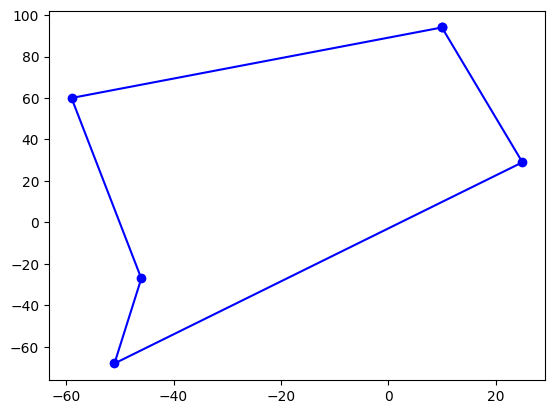

In [143]:
def count_most_common(all_paths):
    appearances = {}
    for path in all_paths:
        amount = all_paths.count(path)
        appearances[str(path)] = amount
    
    most_common = max(appearances, key=appearances.get)
    appearances_number = appearances[most_common]
    return most_common, appearances_number


start = time.time()
algorythm_ACO = AlgorythmACO(adjacency_matrix=adjacency_matrix)
all_paths = algorythm_ACO.search(1000, 300)
print(count_most_common(all_paths))
maby_best = count_most_common(all_paths)[0]
end = time.time()
print(f"ACO Time = {end - start}")
path_count = PathCounter(adjacency_matrix, eval(maby_best))
best_path = path_count.count_path()
cities_drawer = CitiesDrawer(web.cities, best_path[0])
cities_drawer.draw_cities()

Algorytm DFS

DFS Time = 0.00019884109497070312
min distance is 397.7745620171833 for path
[0, 2, 1, 4, 3, 0]


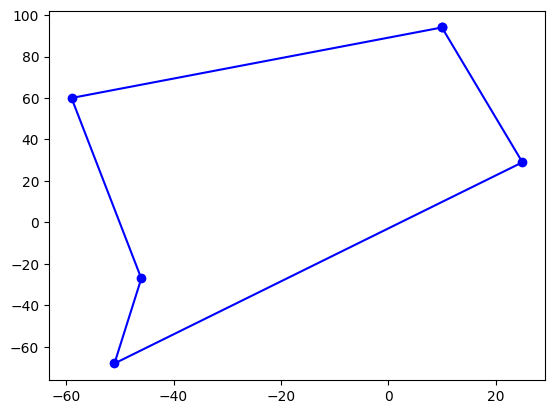

In [144]:


branch_algorytm = Algorythm(adjacency_matrix, START_CITY)
start = time.time()
all_paths = branch_algorytm.tsp_dfs()
end = time.time()
print(f"DFS Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, all_paths)
path_counter.count_all_distances()
best_path = path_counter.print_min_possible_path()
cities_drawer = CitiesDrawer(web.cities, best_path[0])
cities_drawer.draw_cities()

Algorytm NN V2

NN Time = 0.0008831024169921875
min distance is 459.87734657037447 for path
[0, 2, 3, 4, 1, 0]


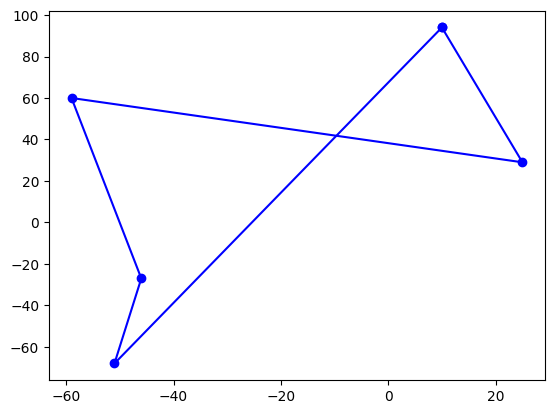

In [145]:
try:
    algorytm_NN = AlgorythmNN(start=0, adjacency_matrix=adjacency_matrix)
    start = time.time()
    path = algorytm_NN.NN_algorytm_V2()
    end = time.time()
    print(f"NN Time = {end - start}")
    path_counter = PathCounter(adjacency_matrix, path)
    best_path = path_counter.count_path()

    cities_drawer = CitiesDrawer(web.cities, best_path[0])
    cities_drawer.draw_cities()
except:
    print("No way")

Algorytm A* heurystyka dopuszczalna

A* admissable Time = 0.0030388832092285156
min distance is 397.7745620171833 for path
[0, 2, 1, 4, 3, 0]


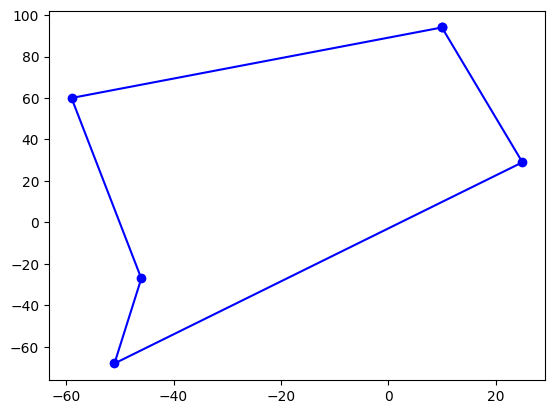

In [146]:
algorytm = Algorythm(adjacency_matrix, START_CITY)
start = time.time()
path = algorytm.A_star_admissable()
end = time.time()
print(f"A* admissable Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, path)
best_path = path_counter.count_path()

cities_drawer = CitiesDrawer(web.cities, best_path[0])
cities_drawer.draw_cities()

Algorytm A* heurystyka niedopuszczalna

A* inadmissable Time = 0.002241849899291992
min distance is 397.7745620171833 for path
[0, 2, 1, 4, 3, 0]


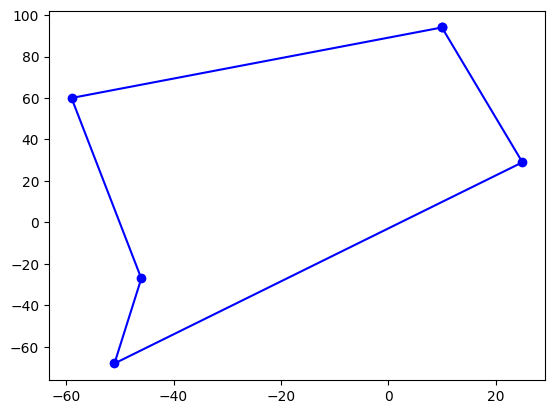

In [147]:
algorytm = Algorythm(adjacency_matrix, START_CITY)
start = time.time()
path = algorytm.A_star_inadmissable()
end = time.time()
print(f"A* inadmissable Time = {end - start}")
path_counter = PathCounter(adjacency_matrix, path)
best_path = path_counter.count_path()

cities_drawer = CitiesDrawer(web.cities, best_path[0])
cities_drawer.draw_cities()

In [107]:
shortest_distances = [[], [], [], [], []]
START_CITY = 0

for i in range(3, 11):
    web = WebOfCities(i)
    graph = Graph(web.cities)
    web.create_weighted_connections_100()
    adjacency_matrix = graph.create_adjacency_weighted_matrix()
    #DFS
    adjacency_matrix_cp = copy.deepcopy(adjacency_matrix)
    branch_algorytm = Algorythm(adjacency_matrix_cp, START_CITY)
    start = time.time()
    all_paths = branch_algorytm.tsp_dfs()
    end = time.time()
    path_counter = PathCounter(adjacency_matrix, all_paths)
    path_counter.count_all_distances()
    best_path = path_counter.print_min_possible_path()
    shortest_distances[0].append(best_path[1])

    #NN
    adjacency_matrix_cp = copy.deepcopy(adjacency_matrix)
    algorytm_NN = AlgorythmNN(start=0, adjacency_matrix=adjacency_matrix_cp)
    start = time.time()
    path = algorytm_NN.NN_algorytm_V2()
    end = time.time()
    path_counter = PathCounter(adjacency_matrix, path)
    best_path = path_counter.count_path()
    shortest_distances[1].append(best_path[1])

    #A* admissable
    adjacency_matrix_cp = copy.deepcopy(adjacency_matrix)
    algorytm = Algorythm(adjacency_matrix, START_CITY)
    start = time.time()
    path = algorytm.A_star_admissable()
    end = time.time()
    path_counter = PathCounter(adjacency_matrix, path)
    best_path = path_counter.count_path()
    shortest_distances[2].append(best_path[1])


    #A* inadmissable
    adjacency_matrix_cp = copy.deepcopy(adjacency_matrix)
    algorytm = Algorythm(adjacency_matrix_cp, START_CITY)
    start = time.time()
    path = algorytm.A_star_inadmissable()
    end = time.time()
    path_counter = PathCounter(adjacency_matrix, path)
    best_path = path_counter.count_path()
    shortest_distances[3].append(best_path[1])

    #ACO
    adjacency_matrix_cp = copy.deepcopy(adjacency_matrix)
    algorythm_ACO = AlgorythmACO(adjacency_matrix=adjacency_matrix_cp)
    all_paths = algorythm_ACO.search(1000, 300)
    maby_best = count_most_common(all_paths)[0]
    end = time.time()
    path_count = PathCounter(adjacency_matrix, eval(maby_best))
    best_path = path_count.count_path()
    shortest_distances[4].append(best_path[1])



min distance is 242.97789278670774 for path
[0, 2, 1, 0]
min distance is 242.97789278670774 for path
[0, 2, 1, 0]
min distance is 242.97789278670774 for path
[0, 2, 1, 0]
min distance is 242.97789278670774 for path
[0, 2, 1, 0]
('[0, 2, 1, 0]', 293)
min distance is 242.97789278670774 for path
[0, 2, 1, 0]
min distance is 249.05926515608436 for path
[0, 3, 2, 1, 0]
min distance is 259.86124617628224 for path
[0, 1, 2, 3, 0]
min distance is 249.05926515608436 for path
[0, 3, 2, 1, 0]
min distance is 249.05926515608436 for path
[0, 3, 2, 1, 0]
('[0, 3, 2, 1, 0]', 300)
min distance is 249.05926515608436 for path
[0, 3, 2, 1, 0]
min distance is 600.7928750721308 for path
[0, 3, 4, 2, 1, 0]
min distance is 633.8560507971753 for path
[0, 1, 3, 4, 2, 0]
min distance is 600.7928750721308 for path
[0, 3, 4, 2, 1, 0]
min distance is 624.4498264289559 for path
[0, 2, 1, 4, 3, 0]
('[0, 3, 4, 2, 1, 0]', 256)
min distance is 600.7928750721308 for path
[0, 3, 4, 2, 1, 0]
min distance is 369.8582426633

In [133]:
times = [[3.0040740966796875e-05, 3.62396240234375e-05, 6.222724914550781e-05, 0.0002028942108154297, 0.0017018318176269531, 0.018591880798339844, 0.09621906280517578, 0.8336648941040039, 8.499051809310913, 117.10200929641724], [0.00025916099548339844, 0.0004088878631591797, 0.0005209445953369141, 0.0006382465362548828, 0.0011379718780517578, 0.0010499954223632812, 0.0011639595031738281, 0.0008881092071533203, 0.0009238719940185547, 0.0017728805541992188], [0.00010204315185546875, 0.00048804283142089844, 0.0009429454803466797, 0.002760171890258789, 0.005215883255004883, 0.006412029266357422, 0.08205389976501465, 0.13637495040893555, 12.376613140106201, 69.92696690559387], [8.296966552734375e-05, 0.00016689300537109375, 0.00019288063049316406, 0.0001800060272216797, 0.00026869773864746094, 0.0003631114959716797, 0.00037288665771484375, 0.00044798851013183594, 0.0007979869842529297, 0.0009641647338867188], [2.7382240295410156, 3.786069869995117, 4.9420318603515625, 6.061500787734985, 7.217302083969116, 8.530563116073608, 9.605347871780396, 10.833615064620972, 12.10542106628418, 13.4092857837677]]

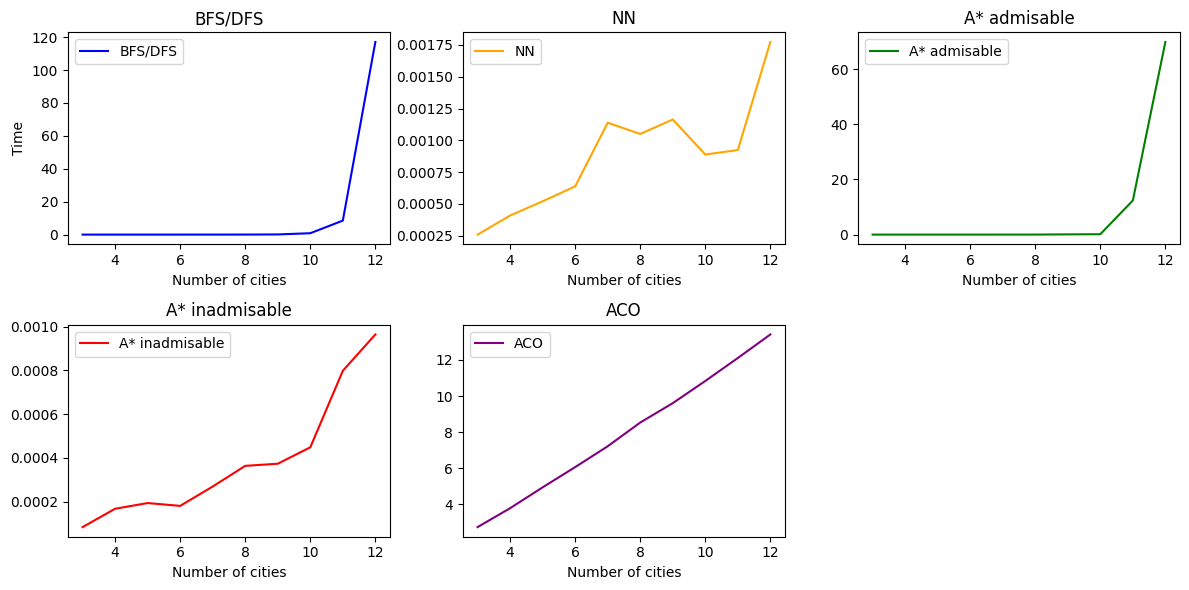

In [141]:

figsize = (12, 6)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=figsize)

ax = axs[0, 0]
ax.plot(list(range(3, 13)), times[0], color='blue', label="BFS/DFS")
ax.set_title("BFS/DFS")
ax.set_xlabel("Number of cities")
ax.set_ylabel("Time")
ax.legend()

ax = axs[0, 1]
ax.plot(list(range(3, 13)), times[1], color='orange', label="NN")
ax.set_title("NN")
ax.set_xlabel("Number of cities")
ax.legend()

ax = axs[0, 2]
ax.plot(list(range(3, 13)), times[2], color='green', label="A* admisable")
ax.set_title("A* admisable")
ax.set_xlabel("Number of cities")
ax.legend()

ax = axs[1, 0]
ax.plot(list(range(3, 13)), times[3], color='red', label="A* inadmisable")
ax.set_title("A* inadmisable")
ax.set_xlabel("Number of cities")
ax.legend()

ax = axs[1, 1]
ax.plot(list(range(3, 13)), times[4], color='purple', label="ACO")
ax.set_title("ACO")
ax.set_xlabel("Number of cities")
ax.legend()

ax = axs[1, 2]
ax.axis('off')

plt.subplots_adjust(hspace=0.5)

plt.tight_layout()

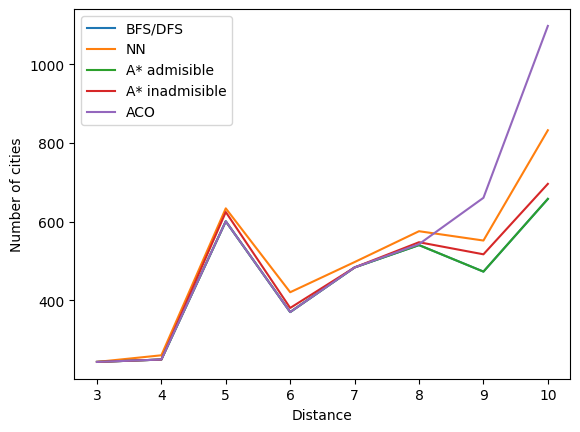

In [113]:
plt.plot(list(range(3, 11)), shortest_distances[0], label="BFS/DFS")
plt.plot(list(range(3, 11)), shortest_distances[1], label="NN")
plt.plot(list(range(3, 11)), shortest_distances[2], label="A* admisible")
plt.plot(list(range(3, 11)), shortest_distances[3], label="A* inadmisible")
plt.plot(list(range(3, 11)), shortest_distances[4], label="ACO")
plt.xlabel("Distance")
plt.ylabel("Number of cities")
plt.legend()
plt.show()